In [8]:
import meep as mp
import numpy as np
import warnings
import os
import h5py
import math

import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sb
#%matplotlib notebook


from sweep_util import *

### Manually calculate FF

In [27]:
hx = 0.3
hy = 0.525
a = 0.387
w = 0.7

(math.pi * hx * hy ) / ( 4 * a * w)

0.45662683918456304

# To do
- Check filling fraction and mirror strength relationships
- Find geometries with lower filling fractions and see how their Q behaves

### Create Filling Fraction Array ###

In [9]:
hf = h5py.File('bandstructure_data/perturb_sub_230_yO.hdf5', 'r')
gamma = np.array( hf.get("gamma"))
freq_lower = np.array( hf.get("freq_lower"))
freq_upper = np.array( hf.get("freq_upper"))
hf.close()

num_x = gamma.shape[3]
num_y = gamma.shape[2]

hx_min , hy_min = 0.125, 0.2
hx_max , hy_max = hx_min + (num_x - 1) * 0.025, hy_min + (num_y - 1) * 0.025

ff = np.copy(gamma[:,:,:,:])
for i in range(ff.shape[0]):
    for j in range(ff.shape[1]):
        for k in range(ff.shape[2]):
            for l in range(ff.shape[3]):
                hx = get_value_from_index(index = l, param = 'hx', hx_min = hx_min, hy_min = hy_min)
                hy = get_value_from_index(index = k, param = 'hy', hx_min = hx_min, hy_min = hy_min)
                a = get_value_from_index(index = j, param = 'a', hx_min = hx_min, hy_min = hy_min)
                w = get_value_from_index(index = i, param = 'w', hx_min = hx_min, hy_min = hy_min)
                
                ff[i,j, k, l] = (math.pi * hx * hy ) / ( 4 * a * w)

In [10]:
print(freq_lower[0,0,0,0])
print(gamma.shape)

225.63086
(2, 201, 17, 11)


# Find out $a_{cen}$ 

In [ ]:
a_cen , res_freq = get_a_cen(target_f_Thz = 196.75, hx = 0.275, hy = 0.525, w = 0.7, 
          freq_lower_data= freq_lower, freq_upper_data= freq_upper)  # FRAUD

print("a_cen = {}".format(a_cen))
print("res_freq = {}".format(res_freq))


In [ ]:
print(get_index(hx = 0.3, hy = 0.3, a = 0.424, w = 0.7, 
          hx_min = hx_min, hy_min = hy_min))
print(ff[(1, 89, 6, 2)])
print(gamma[(1, 130, 3, 6)])
print(freq_lower[1,90, 6,2])
print(freq_upper[1,89, 6,2])

In [25]:
print("hx : " + str(get_value_from_index(index = 7, param = 'hx', hx_min = hx_min, hy_min = hy_min)))
print("hy : " + str(get_value_from_index(index = 13, param = 'hy', hx_min = hx_min, hy_min = hy_min)))
print("a : " + str(get_value_from_index(index = 137, param = 'a', hx_min = hx_min, hy_min = hy_min)))

hx : 0.30000000000000004
hy : 0.525
a : 0.387


In [ ]:
get_gamma_from_Thz(get_freq_Thz(hx = 0.275, hy = 0.525, a = 0.45, w = 0.7, h = 0.25, substrate = True, mode = "yO"), 
                   check_freq= 196.75324675324677) 

### Plot gamma vs 1-parameter ###

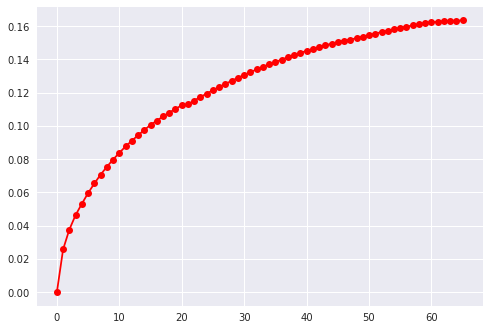

In [19]:
# plt.plot(np.linspace(0.125, 0.45, 201), gamma[1, : , 13, 6])
plt.plot(gamma[1,135:,13,7], 'ro-')

In [ ]:
print(gamma[1,115,13,6])
print(0.25 + 0.001 * 114)

In [21]:
print(ff[1, 200, 13, 7])

0.3926991


## Find out parametric dependence of $\gamma$ 

In [15]:
from numpy import unravel_index
indices_max = unravel_index(gamma.argmax(), gamma.shape)
print("Max Gamma: " + str(gamma[indices_max]))
print("Indices for max gamma: " + str(indices_max))

Max Gamma: 0.1635
Indices for max gamma: (1, 200, 13, 7)


In [14]:
print(get_value_from_index(index = 6, param = 'hx', hx_min = hx_min, hy_min = hy_min))
print(get_value_from_index(index = 13, param = 'hy', hx_min = hx_min, hy_min = hy_min))


0.275
0.525


### Check $hx_{min}$ and $hy_{min}$ ###

In [ ]:
get_freq_Thz(hx = 0.125, hy = 0.2, a = 0.25, w = 0.65, h = 0.25, substrate = True, mode = "yO")

In [ ]:
print(freq_lower[0,0,0,0])
print(freq_upper[get_index(hx = 0.125, hy = 0.2, a = 0.25, w = 0.65, hx_min = hx_min, hy_min = hy_min)])
print(get_value_from_index(index = 0, param = 'hx', hx_min = hx_min, hy_min = hy_min))

## Plot HEATMAPS ##

In [ ]:
x = gamma
plt.gcf().dpi = 100
plt.gcf().set_size_inches(8,4)

x_ticks = np.round(np.linspace(start = hx_min, stop= hx_max, endpoint= True, num = num_x), 3)
y_ticks = np.round(np.linspace(start = hy_min, stop= hy_max , endpoint= True, num = num_y), 3)

#plt.title(r"$\frac{Gamma}{FF}$", pad = 20, fontdict = {"size" : 20})
plt.title(r"$\gamma$", pad = 20, fontdict = {"size" : 20})

# sb.heatmap(x[1, 150,:,:].T, annot= True, ax = plt.gca(), cbar= False, 
#           xticklabels= y_ticks,  yticklabels= x_ticks)

# sb.heatmap(data = x[1, 199 , : , :].T, annot= ff[1, 200,:,:].T , ax = plt.gca(), cbar= False)

sb.heatmap(data = x[1, 199 , : , :].T, annot= True , ax = plt.gca(), cbar= False)
plt.show()

In [ ]:
ff.shape

In [ ]:
a_max = np.argmax(gamma[1, : , :, :] , axis = 0)
gamma_max = np.max(gamma[1, :, :, :], axis = 0)
print(a_max)
print(gamma_max)
print(gamma[1, 99, 6 ,2])
print(ff[1, 99, 6 ,2])

0.25 + 0.147

In [ ]:
print(gamma.shape)
print(hx_max)

In [ ]:
plt.rcParams["font.weight"] = "normal"
label_font_dict = {"fontsize" : 15, 'weight': 'bold'}
title_font_dict = {'fontsize' : 15, 'weight': 'bold'}

In [ ]:
fig , (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (28,8), dpi = 50)

ax_1_x_ticks = np.round(np.linspace(start = hx_min, stop= hx_max, endpoint= True, num = num_x), 3)
ax_1_y_ticks = np.round(np.linspace(start = hy_min, stop= hy_max , endpoint= True, num = num_y), 3)
ax_2_x_ticks = np.round(np.linspace(start = hx_min, stop= hx_max , endpoint= True, num = num_x), 3)
ax_2_y_ticks = np.round(np.linspace(start = hy_min, stop= hy_max , endpoint= True, num = num_y), 3)

sb.heatmap(ff[1,199,:,:].T, annot= True, ax = ax1, cbar = False, 
           xticklabels= ax_1_y_ticks,  yticklabels= ax_1_x_ticks)

sb.heatmap(gamma[1,199,:,:].T, annot= True, ax = ax2, cbar = False,
           xticklabels= ax_2_y_ticks,  yticklabels= ax_2_x_ticks)

ax1.set_title("Filling Fraction", fontdict= title_font_dict, pad = 10)
ax2.set_title("Mirror Strength", fontdict= title_font_dict, pad = 10)

ax1.set_xlabel("$h_y$", fontdict= label_font_dict); ax1.set_ylabel("$h_x$", fontdict= label_font_dict)
ax2.set_xlabel("$h_y$", fontdict= label_font_dict); ax2.set_ylabel("$h_x$", fontdict= label_font_dict)

fig.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# as plot_surface needs 2D arrays as input
hx_index = range(num_x)
hy_index = range(num_y)
a_index = range(201)

#c = ff[1, :, :, :]
c = np.array([ff[1, a, hy, hx] for hx in hx_index for hy in hy_index for a in a_index])
X, Y, Z = np.meshgrid(hx_index, hy_index, a_index, indexing = 'ij')


# data_value shall be represented by color

# map the data to rgba values from a colormap
#colors = cm.ScalarMappable(cmap = "viridis").to_rgba(data_value)

hx_ticks = np.arange(start = 0, stop = num_x - 1 , step = 2)
hy_ticks = np.arange(start = 0, stop = num_y - 1, step = 4)
a_ticks = np.arange(start = 0, stop = 200, step = 40)

hx_range = np.round(hx_min + hx_ticks * 0.025,3)
hy_range = np.round(hy_min + hy_ticks * 0.025,3)
a_range = np.round(0.25 + a_ticks * 0.001,3)

ax.set_xlabel(r'$h_x$', fontdict = {'fontweight': 'bold'})
ax.set_ylabel(r'$h_y$', fontdict = {'fontweight': 'bold'})
ax.set_zlabel(r'$a$', fontdict = {'fontweight': 'bold'})

ax.set_xticks(ticks = hx_ticks)
ax.set_yticks(ticks = hy_ticks)
ax.set_zticks(ticks = a_ticks)

ax.set_xticklabels(labels = hx_range)
ax.set_yticklabels(labels = hy_range)
ax.set_zticklabels(labels = a_range)
#colors = cm.ScalarMappable(cmap = "hot").to_rgba(c)

#img = ax.scatter(X, Y, Z, c = colors)
img = ax.scatter(X, Y, Z, c = c, cmap=plt.hot())

fig.colorbar(img, pad = 0.2)
plt.show()
# plot_surface with points X,Y,Z and data_value as colors
# surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colors,
#                        linewidth=0, antialiased=True)
plt.title('FF')
plt.show()

In [ ]:

hx_index = range(num_x)
hy_index = range(num_y)
check = np.copy(gamma[1, :, :, : ])
Z = np.argmax(check, axis = 0)
X, Y = np.meshgrid(hx_index, hy_index)
ax = fig.gca(projection='3d')
ax.scatter(X, Y, Z, c = 'white', depthshade = True, s = 5, marker = 'o', edgecolors = 'b')
plt.show()

In [ ]:
c = np.array([gamma[1, a, hy, hx] for hx in hx_index for hy in hy_index for a in a_index])

fig2 = plt.figure()
ax = fig.gca(projection='3d')
fig2.colorbar(img)

img = ax.scatter(X, Y, Z, c = c, cmap=plt.hot())
plt.show()
# plot_surface with points X,Y,Z and data_value as colors
# surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colors,
#                        linewidth=0, antialiased=True)

plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

hx_index = range(2)
hy_index = range(2)
a_index = range(2)

X, Y, Z = np.meshgrid(hx_index, hy_index, a_index, indexing = 'ij')

c = [1,2,3,4,5,6,7, 8]
ax.set_xlabel('hx')
ax.set_ylabel('hy')
ax.set_zlabel('a')

img = ax.scatter(X, Y, Z, c = c, cmap=plt.hot())

#fig.colorbar(img)
plt.show()



In [ ]:
[(x, y, z) for x in X for y in  Y for z in  Z]

In [ ]:
Z


In [ ]:
0.15 + np.arange(10) * 0.025